- Can be considered as an extension of the __perceptron model__, where we minimized misclassification errors.
- __However, in SVMs our optimization objective is to maximize the margin.__ The margin is defined as the distance between the separating hyperplane(decision boundary) and the training samples that are closest to this hyperplane, which are the so-called __support vectors.__

![Support Vectors](svm.png)

- The rationale behind having decision boundaries with large margins is that they tend to have a ___Lower generalization error___ whereas _models with small margins are more prone to overfitting._

- To get an dea of the margin maximization, let's take a closer look at those ___postive___ and __negative__ _hyperplane_ that are parallel to the _decision boundary_, which can be expessed as follows:

<center>$w_0 + w^Tx_{pos}  = 1$      </center>      
<center>$w_0 + w^Tx_{neg}  = -1$     </center>

subtracting these two linear equations:
<center>$w^T\left( x_{pos} - x_{neg} \right) = 2$</center>

normalizing, this with the length of the vector __w, defined as__:
<center>$\left|\left|w\right|\right| = \sqrt {\sum_{j=1}^{m} w_{j}^2}$</center>

<p style="align:center;font-size: 140%;">${\frac {w^T\left( x_{pos} - x_{neg} \right)}{\left|\left|w\right|\right|} = \frac{2}{\left|\left|w\right|\right|}}$</p>

The left side of the proceeding equation can be interpreted as __the distance between the positive and negative hyperplanes,__ which is the so-called __margin__ that we want to maximize.

the objective function of the SVM becomes the _maximization of this margin_ by maximizing  <center>$\frac{2}{\left|\left|w\right|\right|}$</center> under the constraint ___that the samples are classified correctly___, which can be written as :

<center>$w_0 + w^Tx^{(i)}  \geq 1 \space \dots if \space y^{(i)} = 1  $   </center>      

<center>$w_0 + w^Tx^{(i)} \space \leq -1 \space \dots if \space y^{(i)} = -1 $   </center>

<center>for $ \space i = 1 \dots N$</center>
Here, N is the number of samples in our dataset

These two equations basically say that _all negative samples should fall on one side of negative hyperplane_ whereas, _all positive samples should fall behind the positive hyperplane,_ which can be written compactly as:
<center>$y^{(i)}\left ( w_0 + w^Tx^{(i)} \right) \space \geq \space 1 \space\forall_{i}$</center>

<br>
In Practice though, it is __easier to minimize the reciprocal term $\frac {1}{2} ||w||^2$__.

### Dealing with a non-linearly separable case using slack $\xi$ variable

Let us, introduce the $\xi$ , which was introduced by _Vladimir Vapnik in 1995_ and led to the so-called __Soft-margin Classification__

- The motivation for introducing slack variable $\xi$ was that the __linear constraint need to be relaxed for nonlinearly separable data__ to allow the convergence of the optimization in presence of misclassifications under appropriate cost penalization.

<center>$w_0 + w^Tx^{(i)}  \geq 1 \space  - \xi^{(i)} \space \dots if \space y^{(i)} = 1 $   </center>      

<center>$w_0 + w^Tx^{(i)} \space \leq -1 \space + \xi^{(i)} \space \dots if \space y^{(i)} = -1  $   </center>

<center>for $ \space i = 1 \dots N$</center>
Here, N is the number of samples in our dataset

so the new objective to be minimized (subject to the constraints) becomes :
<center>$\frac {1}{2} ||w||^2 + C \left( \sum_i \xi^{(i)} \right )$</center>
<br>
Via the variable C, we can control the penalty for misclassification.

_Note :_ Large value of C correspond to large error penalties, whereas we are less strict about misclassification erros if we choose smaller values for C.
- This concept is related to _regularization_, in the context of regularized regression where decreasing the value of C increases the bias and lowers the variance of the model

In [1]:
import sys

sys.path.append('/home/amit/Documents/ML/python_ML_RASCHKA/chap2/')

import numpy as np
import matplotlib.pyplot as plt

from utilities import plot_decision_regions, get_iris

In [23]:
X_train_std, X_test_std, y_train, y_test = get_iris(standarized=True)

####  Let's train a support vector classifier

In [24]:
from sklearn.svm import SVC

In [25]:
svm = SVC(kernel='linear', random_state=1)

In [26]:
svm.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)

In [27]:
X_combined_std = np.vstack((X_train_std,X_test_std))
y_combined = np.hstack((y_train,y_test))

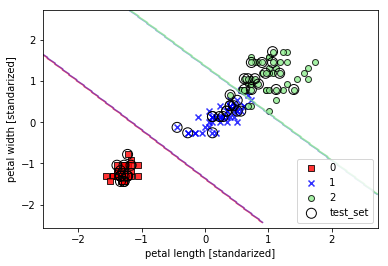

In [28]:
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('petal length [standarized]')
plt.ylabel('petal width [standarized]')
plt.legend(loc = 'lower right')
plt.show()

### Important  Points 
#### Logistics regression versus support vector machine

- In practical classification tasks, linear logistic regression and linear SVMs __yield very similar results.__
- _Logistic regression_ tries to __maximize the conditional likelihood__ of the training data, which makes it __prone to outlier__ than SVMs, which mostly care about the points that are closest to the __decision boundary__(support vectors).
- Logistic regression has the advantage that __is a simpler model__ and __can be implemented more easily.__
- Furthermore, logistic regression models can be easily updated, which is attractive when working with streaming data.